* Attempts to split data into K groups that are closest to K centroids
* Unsupervised learning - uses only the positions of each data point
* Can uncover interesting groupings of people / things / behaviour
    * Example: Where do millionaires live?
    * What genres of music / movies / etc. naturally fall out of data?
    * Create your own stereotypes from demographic data

How it works:
- Randomly pick K centroids (k-means)
- Assign each data point to the centroid it's closest to
- Recompute the centroids based on the average position of each centroid's points
- Iterate until points stop changing assignment to centroids
- If you want to predict the cluster for new points, just find the centroid they're closest to.

### K-means clustering gotchas:
- Choosing K
    - Try increasing K values until you stop getting large reductions in squared error (distances from each point to their centroids)
- Avoiding local minima
    - The random choice of initial centroids can yield different results
    - Run it a few times just to make sure your initial results aren't wachy
- Labeling the clusters
    - K-means does not attempt to assign any meaning to the clusters you find
    - It's up to you to dif into the data and try to determine that
    

### K-Means Clustering Example
Let's make some fake data that includes people clustered by income and age, randomly:

In [14]:
import random
import numpy as np
#Create fake income/age clusters for N people in k clusters
def createClusteredData(N, k):
    random.seed(10)
    pointsPerCluster = float(N)/k
    X = []
    for i in range(k):
        incomeCentroid = random.uniform(20000.0, 200000.0)
        ageCentroid = random.uniform(20.0, 70.0)
        for j in range(int(pointsPerCluster)):
            X.append([np.random.normal(incomeCentroid, 10000.0), np.random.normal(ageCentroid, 2.0)])
    X = np.array(X)
    return X


We'll use k-means to rediscover these clusters in unsupervised learning:

[4 4 2 2 4 4 4 2 2 2 2 2 2 2 4 2 2 4 2 2 1 1 3 1 1 1 1 3 1 1 3 1 1 1 3 1 1
 1 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 1 3 1 3 3 3 3 1 3
 3 3 3 3 3 3 4 4 4 1 1 4 4 4 4 1 2 4 4 4 4 4 1 2 4 4]


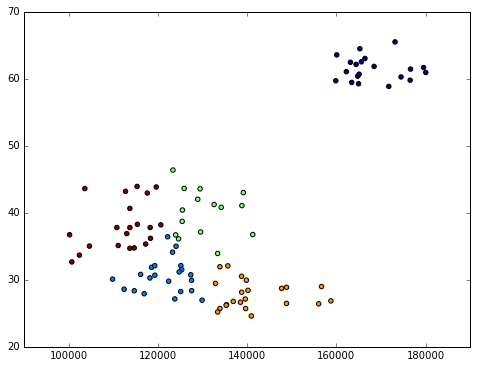

In [15]:
from sklearn.cluster import KMeans
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
data = createClusteredData(100, 5)
model = KMeans(n_clusters=5)
# Scaling the data to normalize it, important for good results
model = model.fit(scale(data))
# We can look at the clusters each data point was assigned to
print(model.labels_)
# And visualize it:
plt.figure(figsize=(8,6))
plt.scatter(data[:, 0], data[:, 1], c=model.labels_.astype(np.float))